# Let's predict which Data Scientist is going to change his job in future???

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


 ## 1. Let's read the data first 

In [32]:
train= pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [33]:
test = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_test.csv')
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


## So these are the features--->

### Features
enrollee_id : Unique ID for enrollee

city: City code

citydevelopmentindex: Developement index of the city (scaled)

gender: Gender of enrolee

relevent_experience: Relevent experience of enrolee

enrolled_university: Type of University course enrolled if any

education_level: Education level of enrolee

major_discipline :Education major discipline of enrolee

experience: Enrolee total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

## Let's gather some more knowledge about our dataset

In [34]:
train.shape

(19158, 14)

In [35]:
test.shape

(2129, 13)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [38]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [39]:
train.describe(include='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


## 2. Checking for missing values

In [40]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

## Let's fill the categorical values with mode and numerical values with median

In [41]:
def fill_with_mode(dataframe, colname):
    mode = dataframe[colname].mode()[0]
    dataframe[colname].fillna(mode, inplace=True)
for i in train.select_dtypes(include='object').columns:
    fill_with_mode(train,i)
for j in test.select_dtypes(include='object').columns:
    fill_with_mode(test,j)

In [42]:
def fill_with_median(dataframe, colname):
    mode = dataframe[colname].mode()[0]
    dataframe[colname].fillna(mode, inplace=True)
for i in train.select_dtypes(include=['float64', 'int64']).columns:
    fill_with_median(train,i)
for j in test.select_dtypes(include=['float64', 'int64']).columns:
    fill_with_median(test,j)

In [43]:
train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [44]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

## Now we are good to go with no more missing values :)

## 3. Do some EDA now

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution of unique values of all the features on the basis of target --->

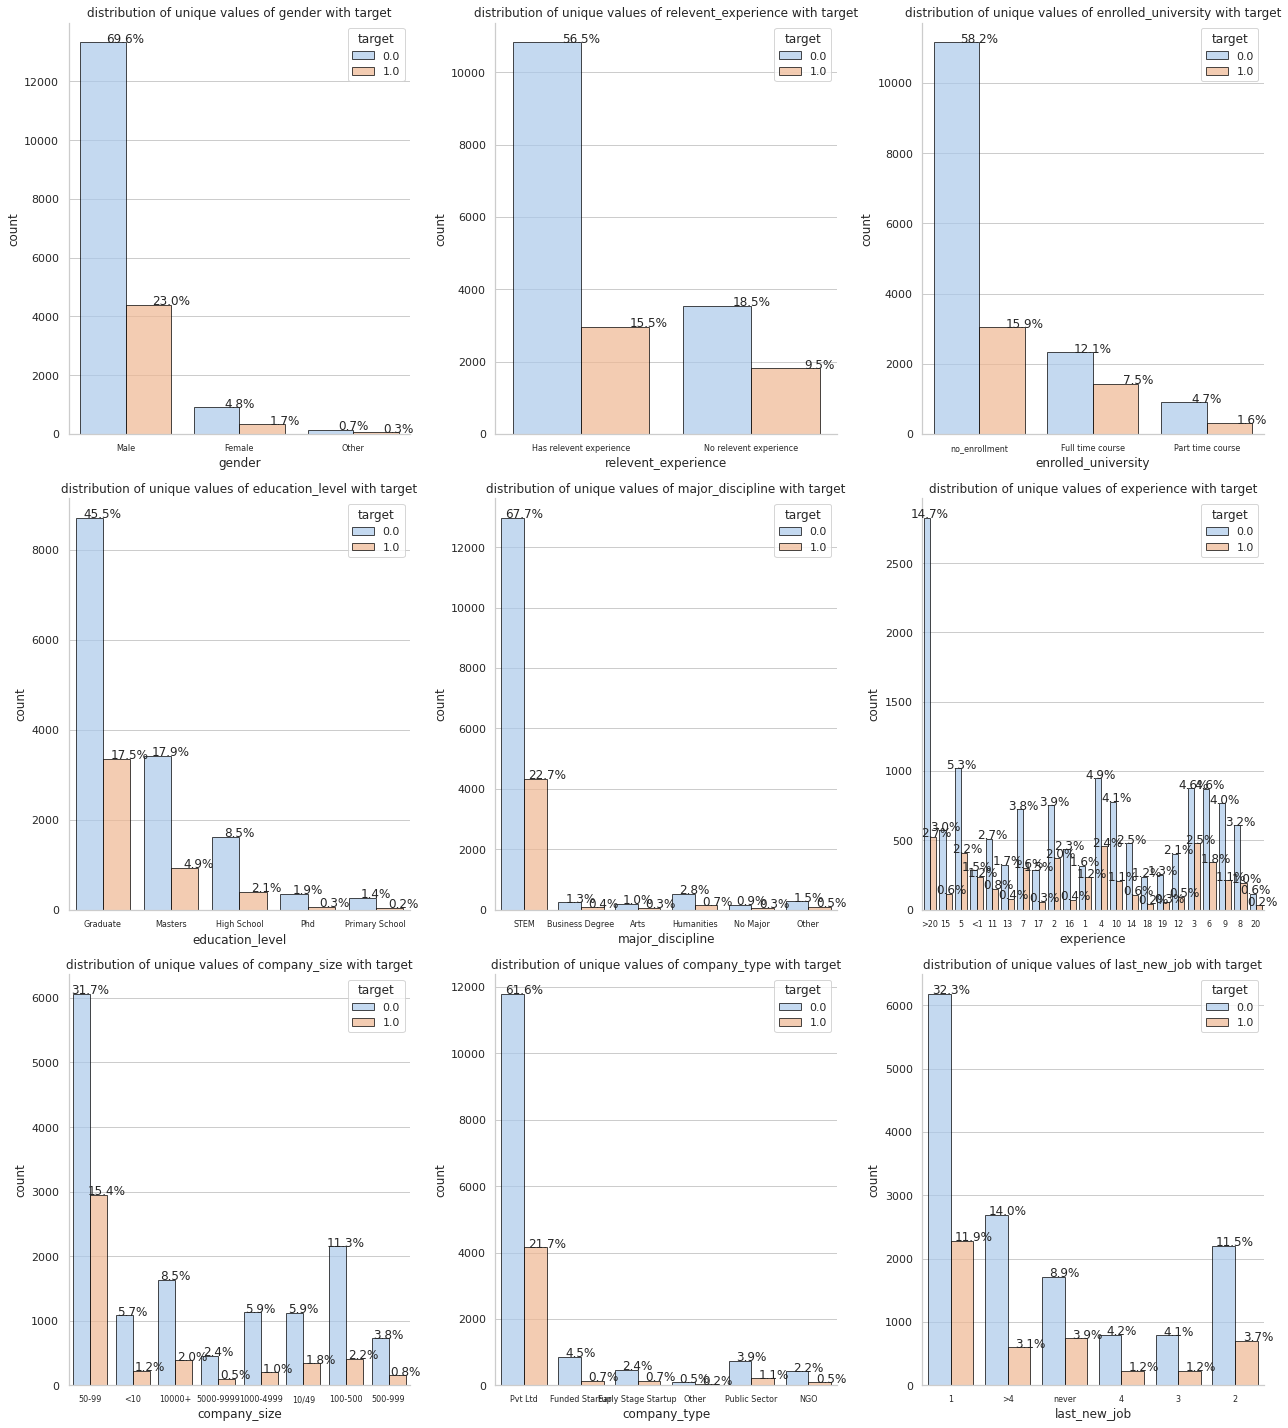

In [46]:
plt.figure(figsize=[18,20])
variables= ['gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']
total = float(len(train))
n=1
for v in variables:
    plt.subplot(3,3,n)
    ax=sns.countplot(x = v, data = train,hue='target', alpha=0.7, edgecolor='black', palette='pastel')
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.3)
    plt.title('distribution of unique values of {} with target'.format(v))
    plt.xticks(fontsize=8)
    plt.subplots_adjust(wspace=0.3)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    n=n+1
    plt.tight_layout()
    sns.despine()

plt.show()


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


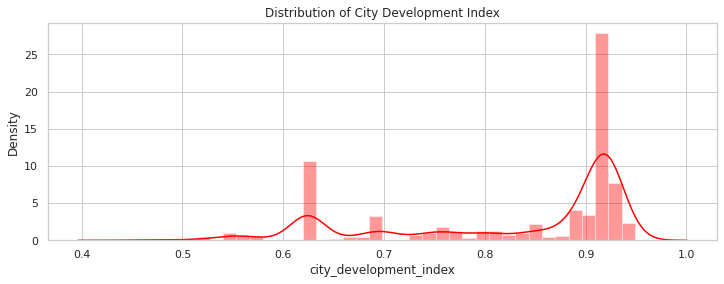

In [47]:
plt.figure(figsize=[12,4])
sns.distplot(train['city_development_index'], color='red')
plt.title('Distribution of City Development Index')
plt.show()

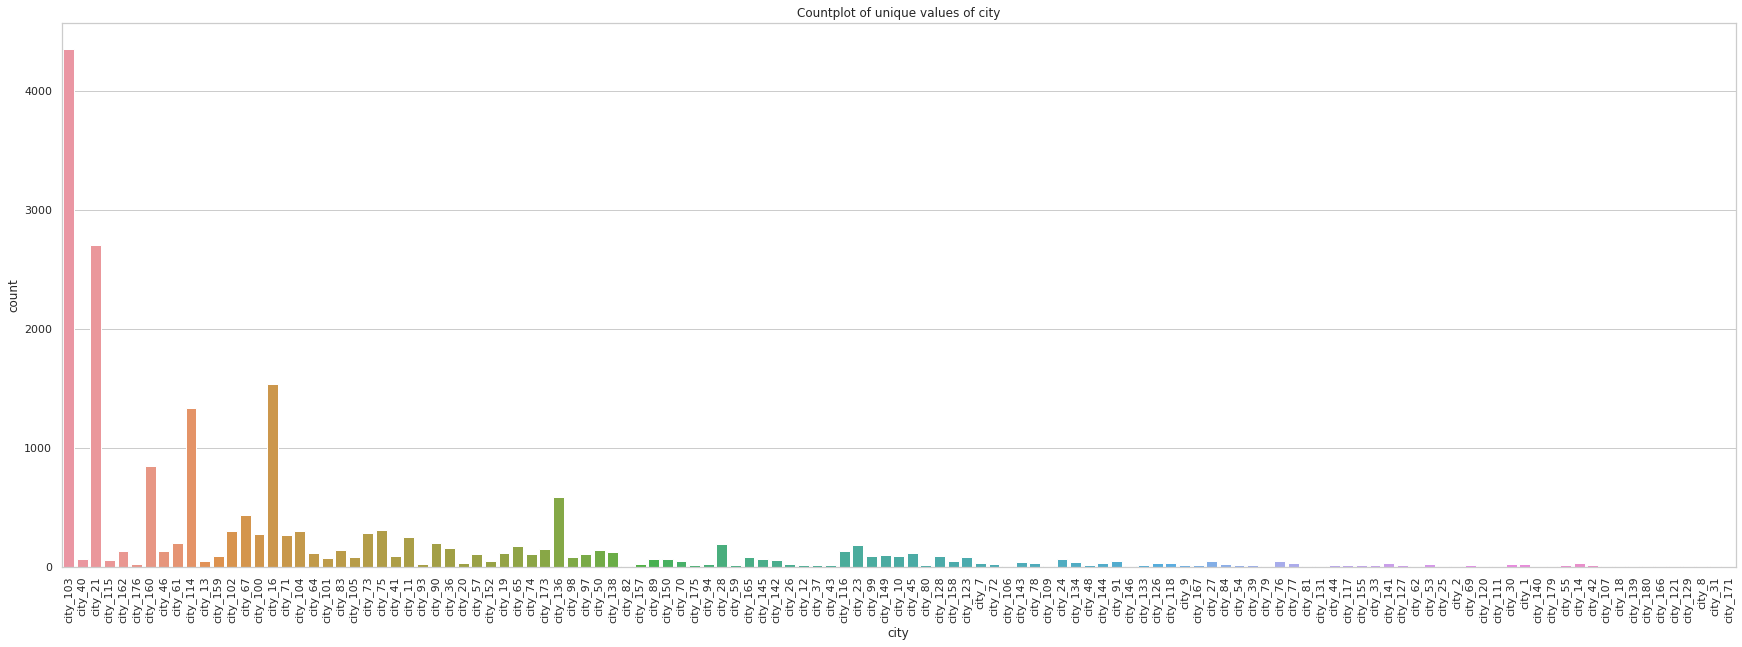

In [48]:
plt.figure(figsize=[30,10])
sns.countplot(x='city', data=train)
plt.title('Countplot of unique values of city')
plt.xticks(rotation=90)
plt.show()

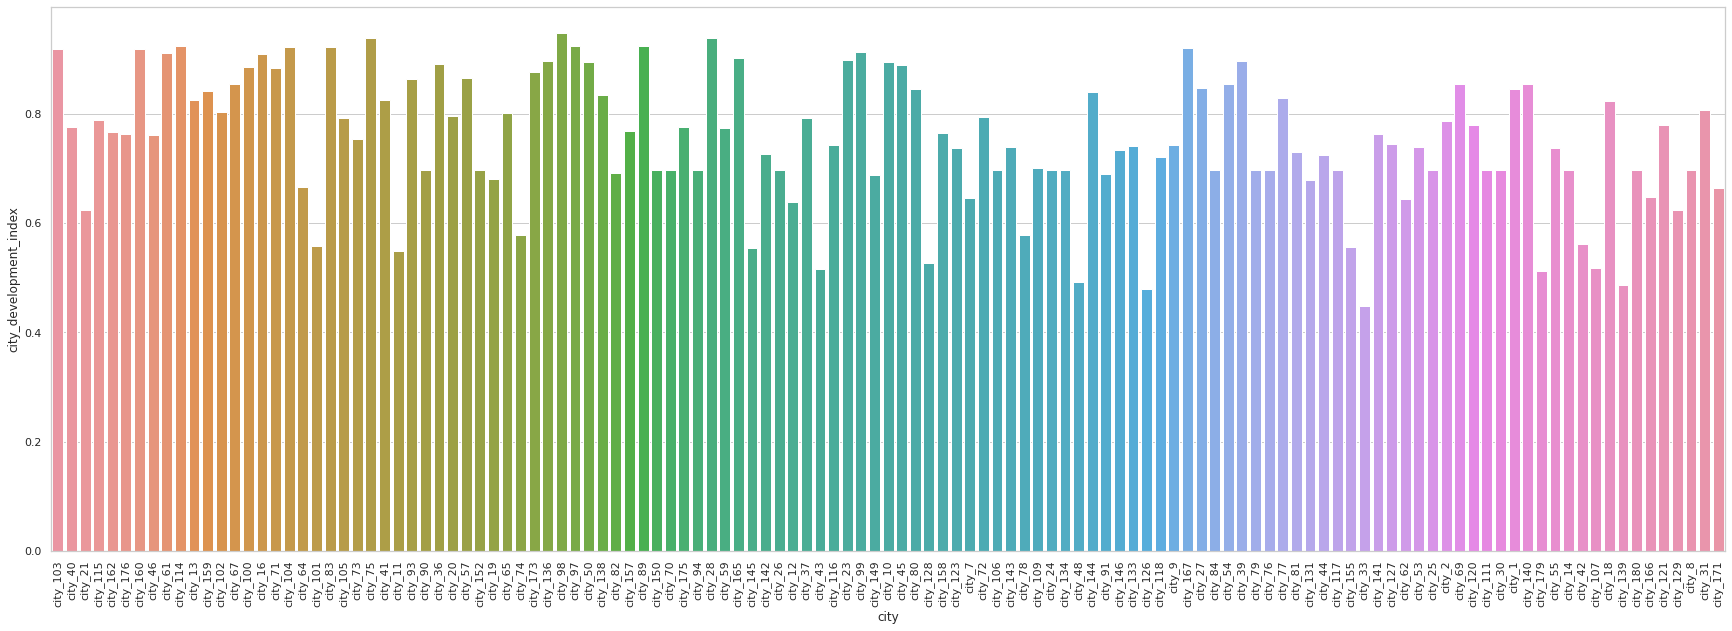

In [49]:
plt.figure(figsize=[30,10])
sns.barplot(data=train, x='city', y='city_development_index')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


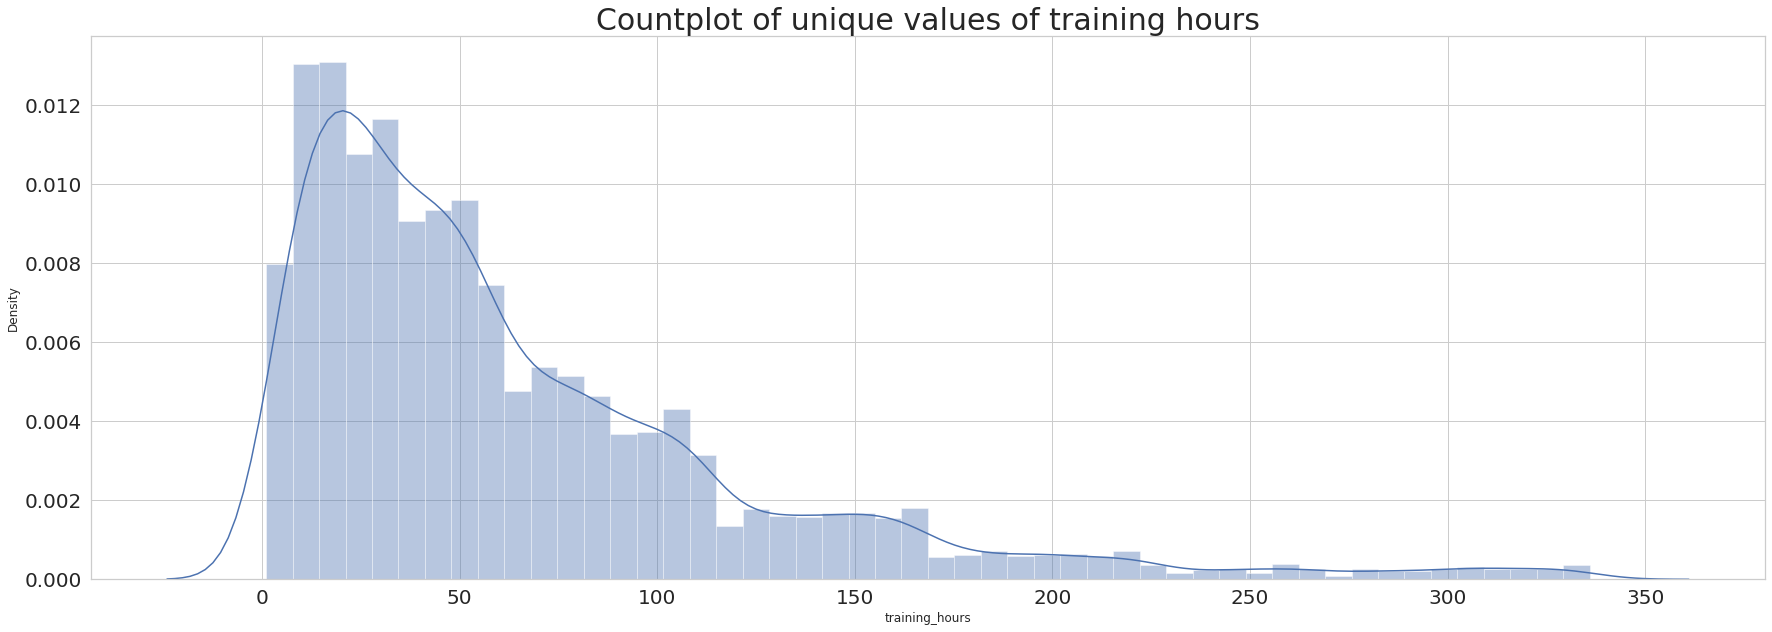

In [50]:
plt.figure(figsize=[30,10])
sns.distplot(train['training_hours'])
plt.title('Countplot of unique values of training hours', fontsize='30')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### Heatmap of numerical features with target --->

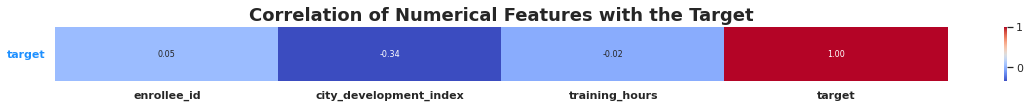

In [51]:
plt.figure(figsize=(20,1))
sns.heatmap(train.corr().sort_values(by = ['target'], ascending = False).head(1), cmap='coolwarm', annot=True, annot_kws={'size': 8}, fmt = '.2f')

plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()

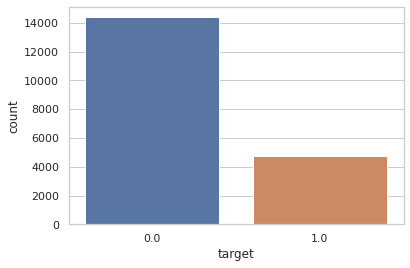

In [52]:
sns.countplot(x='target', data=train)
plt.show()

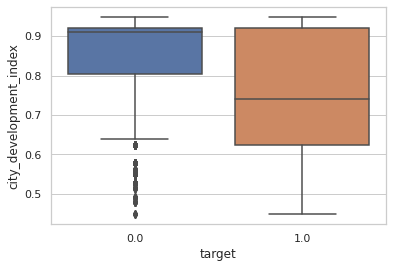

In [53]:
sns.boxplot(x='target', y='city_development_index', data=train)
plt.show()

#### So Data Scientists living in the cities with higher CDI are less likely to change their jobs.

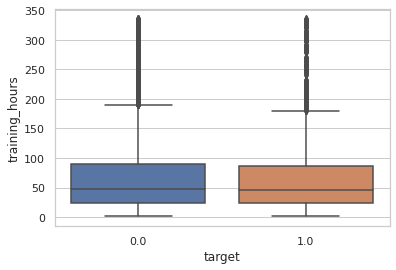

In [54]:
sns.boxplot(x='target', y='training_hours', data=train)
plt.show()

#### Training hours does not effect the probability of changing the job

## 4. Let's encode our categorical features using Label Encoder

In [55]:
# Making Dictionaries of ordinal features

gender_map = {
        'Female': 2,
        'Male': 1,
        'Other': 0
         }

relevent_experience_map = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

enrolled_university_map = {
    'no_enrollment'   :  0,
    'Full time course':    1, 
    'Part time course':    2 
}
    
education_level_map = {
    'Primary School' :    0,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'High School'    :    1, 
    'Phd'            :    4
    } 
    
major_map ={ 
    'STEM'                   :    0,
    'Business Degree'        :    1, 
    'Arts'                   :    2, 
    'Humanities'             :    3, 
    'No Major'               :    4, 
    'Other'                  :    5 
}
    
experience_map = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
} 
    
company_type_map = {
    'Pvt Ltd'               :    0,
    'Funded Startup'        :    1, 
    'Early Stage Startup'   :    2, 
    'Other'                 :    3, 
    'Public Sector'         :    4, 
    'NGO'                   :    5
}

company_size_map = {
    '<10'          :    0,
    '10/49'        :    1, 
    '100-500'      :    2, 
    '1000-4999'    :    3, 
    '10000+'       :    4, 
    '50-99'        :    5, 
    '500-999'      :    6, 
    '5000-9999'    :    7
}
    
last_new_job_map = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [57]:
# Transforming Categorical features into numerical features

train.loc[:,'education_level'] = train['education_level'].map(education_level_map)
train.loc[:,'company_size'] = train['company_size'].map(company_size_map)
train.loc[:,'company_type'] = train['company_type'].map(company_type_map)
train.loc[:,'last_new_job'] = train['last_new_job'].map(last_new_job_map)
train.loc[:,'major_discipline'] = train['major_discipline'].map(major_map)
train.loc[:,'enrolled_university'] = train['enrolled_university'].map(enrolled_university_map)
train.loc[:,'relevent_experience'] = train['relevent_experience'].map(relevent_experience_map)
train.loc[:,'gender'] = train['gender'].map(gender_map)
train.loc[:,'experience'] = train['experience'].map(experience_map)

#encoding city feature using label encoder
lb_en = LabelEncoder()

train.loc[:,'city'] = lb_en.fit_transform(train.loc[:,'city']) 
train.drop(['enrollee_id'], axis=1, inplace=True)

### Some more EDA --->

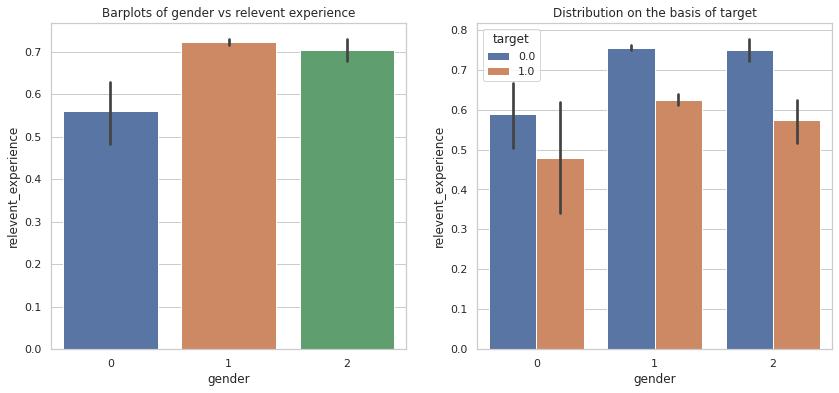

In [88]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=train, x='gender', y='relevent_experience')
plt.title('Barplots of gender vs relevent experience')
plt.subplot(1,2,2)
sns.barplot(data=train, x='gender', y='relevent_experience', hue='target')
plt.title('Distribution on the basis of target')

plt.show()

#### Here 0: others, 1: males, 2: females.

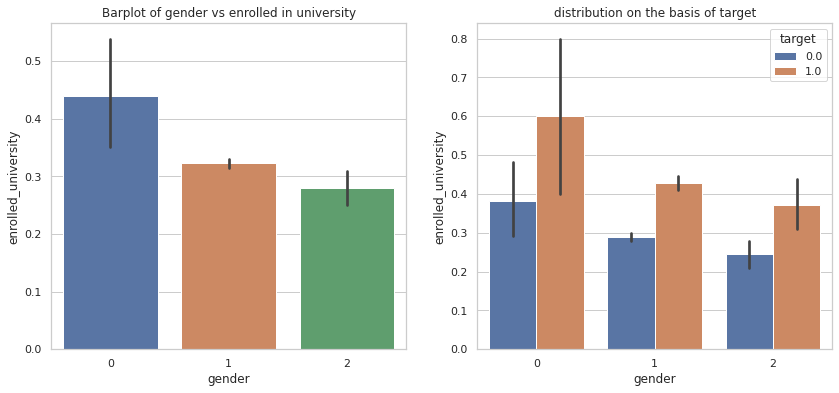

In [85]:
total = float(len(train))
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=train, x='gender', y='enrolled_university')
plt.title('Barplot of gender vs enrolled in university')
plt.subplot(1,2,2)
sns.barplot(data=train, x='gender', y='enrolled_university', hue='target')
plt.title('distribution on the basis of target')

plt.show()

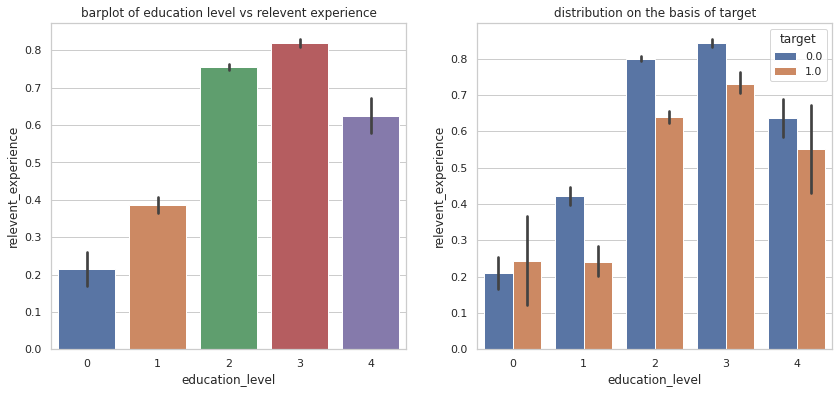

In [86]:
total = float(len(train))
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=train, x='education_level', y='relevent_experience')
plt.title('barplot of education level vs relevent experience')
plt.subplot(1,2,2)
sns.barplot(data=train, x='education_level', y='relevent_experience', hue='target')
plt.title('distribution on the basis of target')

plt.show()

#### here 0:primary school, 1: high school, 2: graduate, 3: masters, 4: phd

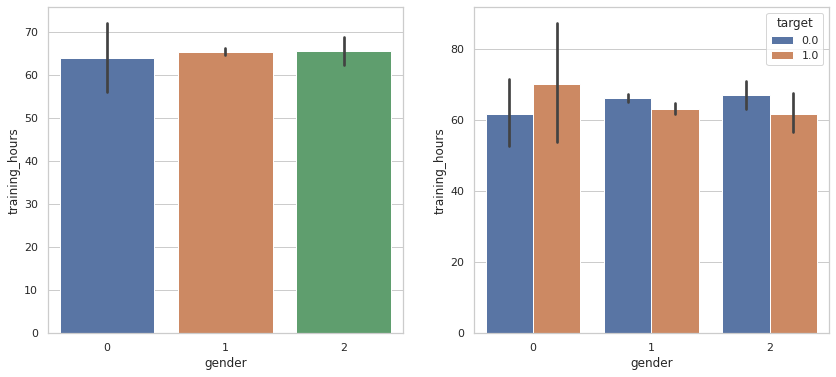

In [61]:
total = float(len(train))
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=train, y='training_hours', x='gender')
plt.subplot(1,2,2)
sns.barplot(data=train, y='training_hours', x='gender', hue='target')

plt.show()

## 5. Modelling

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
X = train.drop("target", axis=1)
y = train["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2, stratify=y)

In [65]:
gb = GaussianNB()
gb.fit(X_train,y_train)
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      2877
         1.0       0.52      0.51      0.51       955

    accuracy                           0.76      3832
   macro avg       0.68      0.68      0.68      3832
weighted avg       0.76      0.76      0.76      3832



In [94]:
print(gb.score(X_train, y_train))

0.7605376484405585


In [66]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.77      0.97      0.86      2877
         1.0       0.58      0.13      0.21       955

    accuracy                           0.76      3832
   macro avg       0.68      0.55      0.53      3832
weighted avg       0.72      0.76      0.70      3832



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [95]:
print(lr.score(X_train, y_train))

0.7576667101657314


In [67]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      2877
         1.0       0.55      0.42      0.47       955

    accuracy                           0.77      3832
   macro avg       0.69      0.65      0.66      3832
weighted avg       0.75      0.77      0.76      3832



In [96]:
print(rfc.score(X_train, y_train))

0.9981730392796555


In [68]:
# Transforming Categorical features into numerical features

test.loc[:,'education_level'] = test['education_level'].map(education_level_map)
test.loc[:,'company_size'] = test['company_size'].map(company_size_map)
test.loc[:,'company_type'] = test['company_type'].map(company_type_map)
test.loc[:,'last_new_job'] = test['last_new_job'].map(last_new_job_map)
test.loc[:,'major_discipline'] = test['major_discipline'].map(major_map)
test.loc[:,'enrolled_university'] = test['enrolled_university'].map(enrolled_university_map)
test.loc[:,'relevent_experience'] = test['relevent_experience'].map(relevent_experience_map)
test.loc[:,'gender'] = test['gender'].map(gender_map)
test.loc[:,'experience'] = test['experience'].map(experience_map)

#encoding city feature using label encoder
lb_en = LabelEncoder()

test.loc[:,'city'] = lb_en.fit_transform(test.loc[:,'city']) 

In [69]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,69,0.827,1,1,1,2,0,9,0,0,1,21
1,9858,5,0.920,2,1,0,2,0,5,5,0,1,98
2,31806,55,0.624,1,0,0,1,0,0,5,0,0,15
3,27385,22,0.827,1,1,0,3,0,11,1,0,1,39
4,27724,5,0.920,1,1,0,2,0,21,4,0,5,72


In [77]:
df_test=test.drop(["enrollee_id"], axis=1)

In [78]:
predictions=rfc.predict(df_test.values)

In [79]:
#Create a  DataFrame
submission = pd.DataFrame({'enrollee_id':test['enrollee_id'],'target':predictions})
                        

#Visualize the first 10 rows
submission.head(10)

,enrollee_id,target
0,32403,0.0
1,9858,0.0
2,31806,0.0
3,27385,0.0
4,27724,0.0
5,217,0.0
6,21465,1.0
7,27302,0.0
8,12994,0.0
9,16287,1.0


In [80]:
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
